Apply K-Means to the Yelp Dataset to cluster restaurants.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("yelp.csv", dtype='unicode')

In [3]:
data = pd.DataFrame(data)

In [4]:
data.head()

,Ambience,DietaryRestrictions_vegan,HappyHour,Thursday_open,Order_at_Counter,HairTypesSpecialized_africanamerican,HairTypesSpecialized_kids,BYOB,Friday_open,categories,...,Smoking,Attire,HairTypesSpecialized_curly,Good_For_Groups,neighborhoods,Open_24_Hours,Ambience_romantic,HairTypesSpecialized_perms,Music_jukebox,Ambience_upscale
0,NaN,NaN,NaN,8:00,NaN,NaN,NaN,NaN,8:00,"[u'Doctors', u'Health & Medical']",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,[u'Nightlife'],...,NaN,NaN,NaN,TRUE,[],NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[u'Active Life', u'Mini Golf', u'Golf']",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,10:00,NaN,NaN,NaN,NaN,10:00,"[u'Shopping', u'Home Services', u'Internet Ser...",...,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
4,FALSE,NaN,FALSE,10:00,NaN,NaN,NaN,NaN,10:00,"[u'Bars', u'American (New)', u'Nightlife', u'L...",...,no,casual,NaN,TRUE,[],NaN,FALSE,NaN,NaN,FALSE


In [5]:
data.columns

Index([u'Ambience', u'DietaryRestrictions_vegan', u'HappyHour',
       u'Thursday_open', u'Order_at_Counter',
       u'HairTypesSpecialized_africanamerican', u'HairTypesSpecialized_kids',
       u'BYOB', u'Friday_open', u'categories', 
       ...
       u'Smoking', u'Attire', u'HairTypesSpecialized_curly',
       u'Good_For_Groups', u'neighborhoods', u'Open_24_Hours',
       u'Ambience_romantic', u'HairTypesSpecialized_perms', u'Music_jukebox',
       u'Ambience_upscale'],
      dtype='object', length=105)

In [6]:
dropColumns = ["HairTypesSpecialized_africanamerican", "HairTypesSpecialized_kids", "BYOB",
               "Corkage", "BYOB/Corkage", "HairTypesSpecialized_straightperms",
               "HairTypesSpecialized_asian", "HairTypesSpecialized_coloring", 
               "Coat_Check", "Music_live", 
               "Music_background_music", "Music_karaoke", "Music_video",
               "Music_playlist", "HairTypesSpecialized_extensions",
               "Accepts_Insurance", "Music_dj", "HairTypesSpecialized_curly",
               "HairTypesSpecialized_perms", "Music_jukebox"]

In [7]:
for column in dropColumns:
    data = data.drop(column, axis=1)

In [8]:
data.columns

Index([u'Ambience', u'DietaryRestrictions_vegan', u'HappyHour',
       u'Thursday_open', u'Order_at_Counter', u'Friday_open', u'categories',
       u'latitude', u'OutdoorSeating', u'Alcohol', u'Ambience_classy',
       u'PaymentTypes_mastercard', u'ParkingLot', u'business_id',
       u'Ambience_touristy', u'Tuesday_open', u'Good_For_brunch',
       u'PaymentTypes_amex', u'name', u'Monday_open', u'Waiter_Service',
       u'Parking_street', u'Ambience_hipster',
       u'DietaryRestrictions_dairy-free', u'Good_For_dinner',
       u'Good_For_breakfast', u'Parking_garage', u'Good_For_Dancing',
       u'review_count', u'state', u'Accepts_Credit_Cards', u'Friday_close',
       u'Good_For_lunch', u'Good_ For_Kids', u'Parking_valet', u'Take-out',
       u'full_address', u'Thursday_close', u'PaymentTypes_cash_only',
       u'Good_For_dessert', u'DietaryRestrictions_halal',
       u'Takes_Reservations', u'Saturday_open', u'AgesAllowed',
       u'Ambience_trendy', u'Delivery', u'Wednesday_close', 

In [9]:
data.categories

0                        [u'Doctors', u'Health & Medical']
1                                           [u'Nightlife']
2                  [u'Active Life', u'Mini Golf', u'Golf']
3        [u'Shopping', u'Home Services', u'Internet Ser...
4        [u'Bars', u'American (New)', u'Nightlife', u'L...
5        [u'Bars', u'American (Traditional)', u'Nightli...
6                          [u'Auto Repair', u'Automotive']
7                           [u'Active Life', u'Mini Golf']
8                       [u'Home Services', u'Contractors']
9        [u'Burgers', u'Breakfast & Brunch', u'American...
10                                   [u'Food', u'Grocery']
11       [u'Bars', u'American (Traditional)', u'Nightli...
12                 [u'Breakfast & Brunch', u'Restaurants']
13                              [u'Cafes', u'Restaurants']
14       [u'Hotels & Travel', u'Event Planning & Servic...
15       [u'Pubs', u'Irish', u'Nightlife', u'Bars', u'R...
16                                                      

In [10]:
categoriesToKeep = ["Restaurants", "Fast Food", "Food"]

In [11]:
rowToDeleteList = []
def getDeleteRowIndices(data, keepCategories):
    count = 0
    for row in data.categories:
        keep = 0
        for category in categoriesToKeep:
            if category in row:
                keep = 1
                break
        if (keep == 0):
            rowToDeleteList.append(count)
        count = count + 1

In [12]:
data

,Ambience,DietaryRestrictions_vegan,HappyHour,Thursday_open,Order_at_Counter,Friday_open,categories,latitude,OutdoorSeating,Alcohol,...,DietaryRestrictions_vegetarian,Wednesday_open,NoiseLevel,Smoking,Attire,Good_For_Groups,neighborhoods,Open_24_Hours,Ambience_romantic,Ambience_upscale
0,NaN,NaN,NaN,8:00,NaN,8:00,"[u'Doctors', u'Health & Medical']",33.499313,NaN,NaN,...,NaN,8:00,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
1,NaN,NaN,TRUE,NaN,NaN,NaN,[u'Nightlife'],40.350519,FALSE,NaN,...,NaN,NaN,NaN,NaN,NaN,TRUE,[],NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"[u'Active Life', u'Mini Golf', u'Golf']",40.3568962,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
3,NaN,NaN,NaN,10:00,NaN,10:00,"[u'Shopping', u'Home Services', u'Internet Ser...",40.35762,NaN,NaN,...,NaN,10:00,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
4,FALSE,NaN,FALSE,10:00,NaN,10:00,"[u'Bars', u'American (New)', u'Nightlife', u'L...",40.408735,FALSE,full_bar,...,NaN,10:00,average,no,casual,TRUE,[],NaN,FALSE,FALSE
5,FALSE,NaN,TRUE,NaN,NaN,NaN,"[u'Bars', u'American (Traditional)', u'Nightli...",40.415517,TRUE,full_bar,...,NaN,NaN,loud,outdoor,casual,TRUE,[u'Greentree'],NaN,FALSE,FALSE
6,NaN,NaN,NaN,NaN,NaN,NaN,"[u'Auto Repair', u'Automotive']",40.394588,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,"[u'Active Life', u'Mini Golf']",40.4054039,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[u'Carnegie'],NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,"[u'Home Services', u'Contractors']",40.406324,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[u'Carnegie'],NaN,NaN,NaN
9,NaN,NaN,NaN,8:00,NaN,8:00,"[u'Burgers', u'Breakfast & Brunch', u'American...",40.3877323,FALSE,none,...,NaN,8:00,NaN,NaN,casual,TRUE,[],NaN,NaN,NaN


In [13]:
getDeleteRowIndices(data, categoriesToKeep)

In [14]:
data = data.drop(data.index[rowToDeleteList])

In [15]:
data

,Ambience,DietaryRestrictions_vegan,HappyHour,Thursday_open,Order_at_Counter,Friday_open,categories,latitude,OutdoorSeating,Alcohol,...,DietaryRestrictions_vegetarian,Wednesday_open,NoiseLevel,Smoking,Attire,Good_For_Groups,neighborhoods,Open_24_Hours,Ambience_romantic,Ambience_upscale
4,FALSE,NaN,FALSE,10:00,NaN,10:00,"[u'Bars', u'American (New)', u'Nightlife', u'L...",40.408735,FALSE,full_bar,...,NaN,10:00,average,no,casual,TRUE,[],NaN,FALSE,FALSE
5,FALSE,NaN,TRUE,NaN,NaN,NaN,"[u'Bars', u'American (Traditional)', u'Nightli...",40.415517,TRUE,full_bar,...,NaN,NaN,loud,outdoor,casual,TRUE,[u'Greentree'],NaN,FALSE,FALSE
9,NaN,NaN,NaN,8:00,NaN,8:00,"[u'Burgers', u'Breakfast & Brunch', u'American...",40.3877323,FALSE,none,...,NaN,8:00,NaN,NaN,casual,TRUE,[],NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,"[u'Food', u'Grocery']",40.3877323,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN
11,FALSE,NaN,NaN,NaN,NaN,NaN,"[u'Bars', u'American (Traditional)', u'Nightli...",40.3964688,FALSE,full_bar,...,NaN,NaN,average,no,casual,TRUE,[],NaN,FALSE,FALSE
12,TRUE,NaN,NaN,6:00,TRUE,6:00,"[u'Breakfast & Brunch', u'Restaurants']",40.3967441,FALSE,none,...,NaN,6:00,average,NaN,casual,FALSE,[],NaN,FALSE,FALSE
13,FALSE,NaN,NaN,NaN,NaN,NaN,"[u'Cafes', u'Restaurants']",40.404638,FALSE,none,...,NaN,NaN,average,NaN,casual,TRUE,[u'Carnegie'],NaN,FALSE,FALSE
15,FALSE,NaN,NaN,NaN,NaN,NaN,"[u'Pubs', u'Irish', u'Nightlife', u'Bars', u'R...",40.40867,TRUE,full_bar,...,NaN,NaN,average,NaN,casual,TRUE,[u'Carnegie'],NaN,FALSE,FALSE
18,FALSE,NaN,NaN,NaN,NaN,NaN,[u'Restaurants'],40.3868915,FALSE,none,...,NaN,NaN,average,NaN,casual,TRUE,[],NaN,FALSE,FALSE
20,NaN,NaN,NaN,NaN,NaN,NaN,"[u'Chinese', u'Restaurants']",40.408343,FALSE,none,...,NaN,NaN,quiet,NaN,casual,FALSE,[u'Carnegie'],NaN,NaN,NaN


In [16]:
data.columns

Index([u'Ambience', u'DietaryRestrictions_vegan', u'HappyHour',
       u'Thursday_open', u'Order_at_Counter', u'Friday_open', u'categories',
       u'latitude', u'OutdoorSeating', u'Alcohol', u'Ambience_classy',
       u'PaymentTypes_mastercard', u'ParkingLot', u'business_id',
       u'Ambience_touristy', u'Tuesday_open', u'Good_For_brunch',
       u'PaymentTypes_amex', u'name', u'Monday_open', u'Waiter_Service',
       u'Parking_street', u'Ambience_hipster',
       u'DietaryRestrictions_dairy-free', u'Good_For_dinner',
       u'Good_For_breakfast', u'Parking_garage', u'Good_For_Dancing',
       u'review_count', u'state', u'Accepts_Credit_Cards', u'Friday_close',
       u'Good_For_lunch', u'Good_ For_Kids', u'Parking_valet', u'Take-out',
       u'full_address', u'Thursday_close', u'PaymentTypes_cash_only',
       u'Good_For_dessert', u'DietaryRestrictions_halal',
       u'Takes_Reservations', u'Saturday_open', u'AgesAllowed',
       u'Ambience_trendy', u'Delivery', u'Wednesday_close', 

There are no businesses in the data that have no star ratings.

In [17]:
%matplotlib inline

Convert the review stars of businesses to floats to visually see the ratings.

In [18]:
data.stars = data.stars.astype(float)

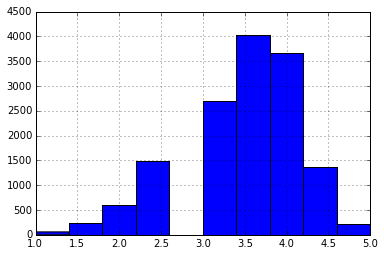

In [19]:
data.stars.hist()

In [20]:
data.stars.describe()

count    14353.000000
mean         3.442207
std          0.724786
min          1.000000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: stars, dtype: float64

In [21]:
data.columns

Index([u'Ambience', u'DietaryRestrictions_vegan', u'HappyHour',
       u'Thursday_open', u'Order_at_Counter', u'Friday_open', u'categories',
       u'latitude', u'OutdoorSeating', u'Alcohol', u'Ambience_classy',
       u'PaymentTypes_mastercard', u'ParkingLot', u'business_id',
       u'Ambience_touristy', u'Tuesday_open', u'Good_For_brunch',
       u'PaymentTypes_amex', u'name', u'Monday_open', u'Waiter_Service',
       u'Parking_street', u'Ambience_hipster',
       u'DietaryRestrictions_dairy-free', u'Good_For_dinner',
       u'Good_For_breakfast', u'Parking_garage', u'Good_For_Dancing',
       u'review_count', u'state', u'Accepts_Credit_Cards', u'Friday_close',
       u'Good_For_lunch', u'Good_ For_Kids', u'Parking_valet', u'Take-out',
       u'full_address', u'Thursday_close', u'PaymentTypes_cash_only',
       u'Good_For_dessert', u'DietaryRestrictions_halal',
       u'Takes_Reservations', u'Saturday_open', u'AgesAllowed',
       u'Ambience_trendy', u'Delivery', u'Wednesday_close', 

In [22]:
data[data.stars.isnull()]

,Ambience,DietaryRestrictions_vegan,HappyHour,Thursday_open,Order_at_Counter,Friday_open,categories,latitude,OutdoorSeating,Alcohol,...,DietaryRestrictions_vegetarian,Wednesday_open,NoiseLevel,Smoking,Attire,Good_For_Groups,neighborhoods,Open_24_Hours,Ambience_romantic,Ambience_upscale


In [23]:
# Keep only the columns that matter 
keepColumns = ['Good_For_lunch', 'Good_For_Groups', 'NoiseLevel', 'Price_Range', 'Alcohol', 'Good_For_dinner', 'PaymentTypes_cash_only', 'PaymentTypes_mastercard', 'stars', 'HappyHour', 'Price_Range', 'Smoking', 'Parking_street', 'PaymentTypes_discover']

In [24]:
# Get columns to delete
delete = [x for x in data.columns if x not in keepColumns]

In [25]:
for item in delete:
    data = data.drop(item, axis=1)

In [26]:
data

,HappyHour,Alcohol,PaymentTypes_mastercard,Parking_street,Good_For_dinner,Good_For_lunch,PaymentTypes_cash_only,PaymentTypes_discover,stars,Price_Range,NoiseLevel,Smoking,Good_For_Groups
4,FALSE,full_bar,NaN,FALSE,FALSE,FALSE,NaN,NaN,4.5,1,average,no,TRUE
5,TRUE,full_bar,NaN,FALSE,TRUE,FALSE,NaN,NaN,4.0,1,loud,outdoor,TRUE
9,NaN,none,NaN,FALSE,FALSE,FALSE,NaN,NaN,3.5,1,NaN,NaN,TRUE
10,NaN,NaN,NaN,FALSE,NaN,NaN,NaN,NaN,3.5,3,NaN,NaN,NaN
11,NaN,full_bar,NaN,FALSE,FALSE,FALSE,NaN,NaN,4.0,2,average,no,TRUE
12,NaN,none,NaN,FALSE,FALSE,FALSE,NaN,NaN,4.5,1,average,NaN,FALSE
13,NaN,none,NaN,FALSE,FALSE,FALSE,NaN,NaN,4.0,1,average,NaN,TRUE
15,NaN,full_bar,NaN,TRUE,TRUE,FALSE,NaN,NaN,3.5,2,average,NaN,TRUE
18,NaN,none,NaN,FALSE,NaN,NaN,NaN,NaN,3.5,1,average,NaN,TRUE
20,NaN,none,NaN,FALSE,NaN,NaN,NaN,NaN,2.5,1,quiet,NaN,FALSE


In [27]:
#Create dummy array
for col in keepColumns:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)

In [28]:
for col in keepColumns:
    data = data.drop(col, axis = 1)

In [29]:
data

,Good_For_lunch_FALSE,Good_For_lunch_TRUE,Good_For_Groups_FALSE,Good_For_Groups_TRUE,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,Price_Range_1,Price_Range_2,...,Price_Range_2,Price_Range_3,Price_Range_4,Smoking_no,Smoking_outdoor,Smoking_yes,Parking_street_FALSE,Parking_street_TRUE,PaymentTypes_discover_FALSE,PaymentTypes_discover_TRUE
4,1,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
5,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
9,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
11,1,0,0,1,1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
12,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
13,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
15,1,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
18,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [31]:
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]

    import matplotlib.pyplot as plt
    %matplotlib inline
    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])
 
    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

In [32]:

#feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

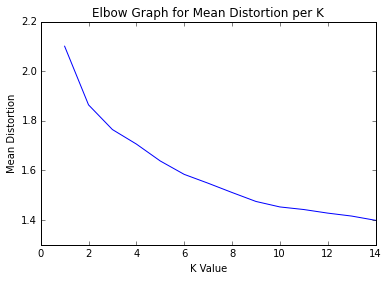

In [33]:
find_k(np.matrix(data), range(1,15), sample_percent=1)

The first 'elbow' appears at about 2, which means that the distribution of values has 2 labels.

In [34]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [35]:
data['labels'] = kmeans_model.labels_

In [36]:
data.head(100)

,Good_For_lunch_FALSE,Good_For_lunch_TRUE,Good_For_Groups_FALSE,Good_For_Groups_TRUE,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,Price_Range_1,Price_Range_2,...,Price_Range_3,Price_Range_4,Smoking_no,Smoking_outdoor,Smoking_yes,Parking_street_FALSE,Parking_street_TRUE,PaymentTypes_discover_FALSE,PaymentTypes_discover_TRUE,labels
4,1,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
5,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
9,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
11,1,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
12,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
15,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
18,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
20,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


The clustering of restaurants to groups can be seen in the table above where more similar restaurants are one label.